# Generate Synthetic Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x1 = np.random.randint(low=0, high=100, size= 200)
x2 = np.random.randint(low=0, high=100, size= 200)
data = {'x1':x1, 'x2':x2, 'y':0}

df_red = pd.DataFrame.from_dict(data)
df_red.head()

,x1,x2,y
0,0,14,0
1,50,49,0
2,66,3,0
3,34,35,0
4,12,2,0


In [3]:
idx = df_red[(df_red.x1 < 50) & (df_red.x2> 20) & (df_red.x2 < 30)].index
idx

Int64Index([7, 23, 56, 78, 91, 99, 114, 142, 147, 177], dtype='int64')

In [4]:
df_red.drop(index =idx, inplace=True)

In [5]:
df_red = df_red.sample(100)

In [6]:
x1 = np.random.randint(low=0, high=50, size= 100)
x2 = np.random.randint(low=20, high=30, size= 100)
data = {'x1':x1, 'x2':x2, 'y':1}

df_blue = pd.DataFrame.from_dict(data)
df_blue.head()

,x1,x2,y
0,10,21,1
1,34,29,1
2,16,29,1
3,3,29,1
4,43,27,1


In [7]:
data = pd.concat([df_red, df_blue], axis=0)
data.head()

,x1,x2,y
109,99,34,0
32,94,93,0
26,50,79,0
13,75,54,0
1,50,49,0


### Visualise Data

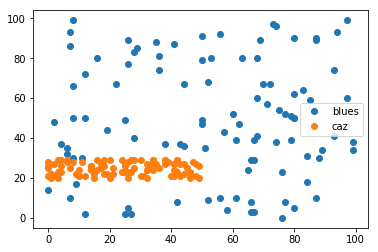

In [8]:
plt.plot(data[data.y==0].x1, data[data.y==0].x2, 'o', label = "blues")
plt.plot(data[data.y==1].x1, data[data.y==1].x2, 'o', label = "caz")
plt.legend()

## Apply Machine LEarning Algorithms

Look at
 - [Scikit-Learn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

### Helper Method to display decision Regions

In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=cl,
        edgecolor='black')

## K-Nearest Neighbors

In [20]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluation

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

# Scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Apply ML
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
# Learn best parameters
knn.fit(X_train, y_train)
# Prediction
y_pred = knn.predict(X_test)
# Evaluation
accuracy_score(y_test, y_pred)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


1.0

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


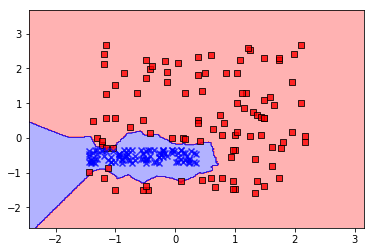

In [21]:
plot_decision_regions(scaler.transform(X), y, classifier=knn)

### Logistic REgression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

X, y = data.values[:,:-1], data.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, stratify=y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.82


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


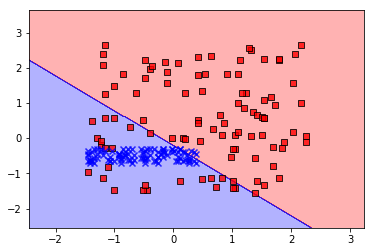

In [11]:
plot_decision_regions(scaler.transform(X), y, classifier=model)

### Decision Tree Algorithm

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))


1.0


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


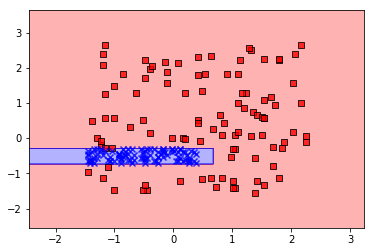

In [13]:
plot_decision_regions(scaler.transform(X), y, classifier=tree)

### Neural Networks

In [14]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10, 10), random_state=1)

X, y = data.values[:,:-1], data.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33,stratify=y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


1.0


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


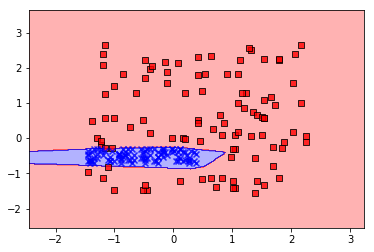

In [15]:
plot_decision_regions(scaler.transform(X), y, classifier=clf)

### Random Forest

1.0


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


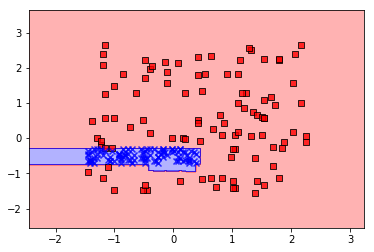

In [16]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(accuracy_score(y_test, y_pred))


plot_decision_regions(scaler.transform(X), y, classifier=forest)

#### Importance of Features

In [22]:
importances = forest.feature_importances_
importances

indices = np.argsort(importances)[::-1]

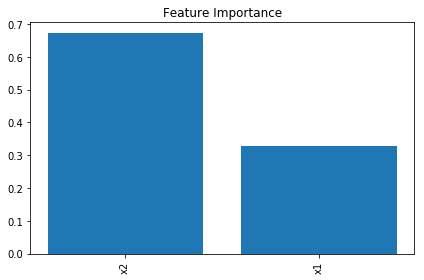

In [23]:
plt.bar(range(X_train.shape[1]),importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), data.columns[:-1][indices], rotation=90)
plt.title('Feature Importance');plt.tight_layout()